# Stable Diffusion

In [1]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

In [2]:
from diffusers import StableDiffusionPipeline

model_id = "runwayml/stable-diffusion-v1-5"
pipeline = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    use_safetensors=True
).to(device)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


In [3]:
# 난수 씨드 고정
def set_seed(seed):
  torch.manual_seed(seed)
  torch.cuda.manual_seed_all(seed)

  0%|          | 0/50 [00:00<?, ?it/s]

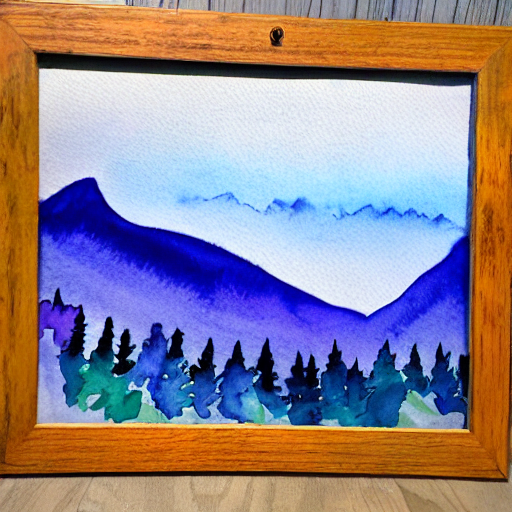

In [6]:
# set_seed(42)

prompt = "A tranquil mountain landscape at sunset, watercolor style."

result = pipeline(
    prompt,
    num_inference_steps=50,
    guidance_scale=7.5
)
display(result.images[0])

In [7]:
# 한꺼번에 여러 이미지 생성 (배치 단위 생성)
prompts = [
    "A futuristic city skyline at sunrise",
    "Portrait of a medieval knight in armor",
    "A colorful abstract painting featuring geometric shapes",
]

results = pipeline(
    prompts,
    num_inference_steps=50,
    guidance_scale=7.5,
    width=768,
    height=512
)
print(results.images)

  0%|          | 0/50 [00:00<?, ?it/s]

[<PIL.Image.Image image mode=RGB size=768x512 at 0x7C915EEEA7E0>, <PIL.Image.Image image mode=RGB size=768x512 at 0x7C915EE6E4B0>, <PIL.Image.Image image mode=RGB size=768x512 at 0x7C915C2C9D30>]


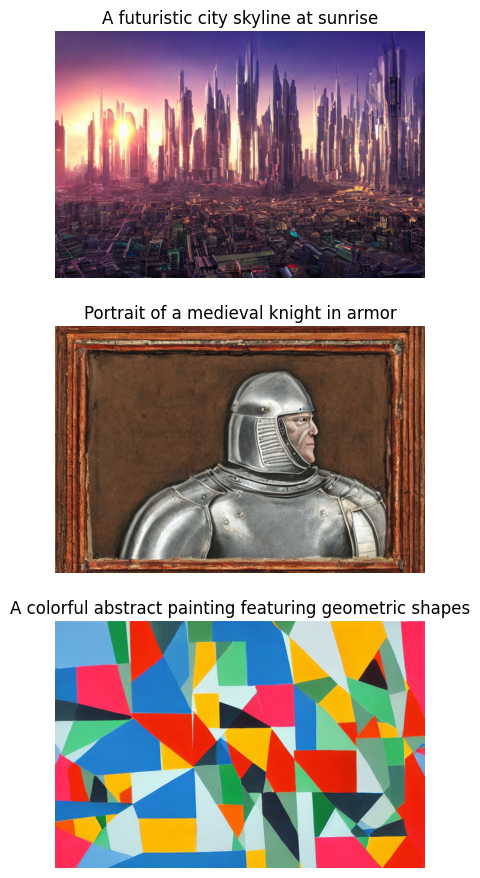

In [8]:
import matplotlib.pyplot as plt

images = results.images
n = len(images)

plt.figure(figsize=(4, 3 * n))
for i, img in enumerate(images):
  plt.subplot(n, 1, i+1)
  plt.imshow(img)
  plt.title(prompts[i])
  plt.axis("off")

plt.tight_layout()
plt.show()